# **Assign Location** <font>

## This notebook provides simple code in order to assign an address/location to samples within a dataset

* To do so, a user can input a dataset of choice. For this example we pull data from SandSnap
* The notebook then calls in the Open Street Maps geocoder API and uses reverse geocoding to assign an address to a lat/lon location
    
    
    
## <font color=grey> *This notebooks' output is a dataframe containing all of the data from the sample dataset uploaded by the user with an new added field containg the address of each sample. As the API needs to be called for each individual sample, it is recommended that the user selects data sparingly if time is a constrait as processing time may take a while depending on internet connectivity. *<font>





## Run these two cells  to get everything set up:

In [ ]:
import pandas as pd
import geocoder
import requests

In [ ]:
# from https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    """
    response = filename for input
    destination = filename for output
    """    
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)


## Run this cell with your own data instead of the example data by entering the filepath of a desired file. If you want to use the example data, skip it.

In [ ]:
#Enter variable here"
filepath='user/your_folder/your_file.csv'


df= pd.read_csv(filepath)

In [ ]:
## Run this cell with your own data instead of the example data by entering the filepath of a desired file. If you want to use the example data, skip it.

In [ ]:
df["Location"] = ""
df["State"] = ""


count=0
for i in range(0,len(data)):
    try:
        lat=df['latitude'].iloc[i]
        lon=df['longitude'].iloc[i]
        g=geocoder.osm([lat,lon], method='reverse')
        df['Location'].iloc[i]=g.json['address']
        count=count+1
    except:
        pass # doing nothing on exception


    


Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


In [11]:
g

<[OK] Osm - Reverse [México]>

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

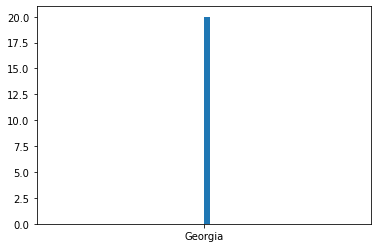

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(data['State'], bins=50)